<a href="https://colab.research.google.com/github/ZeroAthena/SimMat02025/blob/main/Examen2_OrtizFranco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Módulo 2 - Montecarlo.

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que, sobre todo, se está evaluando su capacidad de interpretar los resultados. Escriba sus **interpretaciones/conclusiones** en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

---
### Simulación Montecarlo usando Caminata aleatoria<font size='1'>(5.1 puntos)</font>

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A**, **B** y **C**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 3 de cada 5 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 2 de cada 3 operaciones cambia al estado **A**, el resto de casos cambia al estado **C**.
* Estando en el estado **C**, 4 de cada 5 operaciones cambia al estado **A**, el resto de casos cambia al estado **B**.

Respresentado por el siguiente diagrama

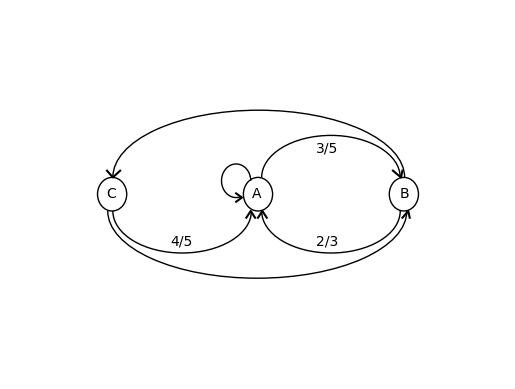

In [ ]:
# @markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

A = patches.Circle((0, 0), 0.1,fc='None',color='k')
B = patches.Circle((1, 0), 0.1,fc='None',color='k')
C = patches.Circle((-1,0), 0.1,fc='None',color='k')
AB = patches.Arc((0.5,   0.1 ), 0.95, 0.5,theta2=180,fc='None',color='k')
BA = patches.Arc((0.5,   -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
BC = patches.Arc((0.005, 0.1), 2.0, 0.8,theta2=180,fc='None',color='k')
CB = patches.Arc((-0.005, -0.1), 2.05, 0.8,theta1=180,fc='None',color='k')
CA = patches.Arc((-0.52, -0.1), 0.95, 0.5,theta1=180,fc='None',color='k')
AA = patches.Arc((-0.15, 0.08), 0.2,  0.2,theta2=290,fc='None',color='k')
ax = plt.gca()
ax.add_artist(A)
ax.add_artist(B)
ax.add_artist(C)
ax.add_artist(AB)
ax.add_artist(BA)
ax.add_artist(BC)
ax.add_artist(CB)
ax.add_artist(CA)
ax.add_artist(AA)

plt.plot([0.925,0.98,0.99],[0.14,0.1,0.14],'k')    # AB
plt.plot([0.06,0.03,0],[-0.14,-0.1,-0.14],'k')       # BA
plt.plot([-0.945,-0.995,-1.035],[0.14,0.1,0.14],'k') # BC
plt.plot([-0.02,-0.05,-0.08],[-0.14,-0.1,-0.14],'k') # CA
plt.plot([-0.15,-0.11,-0.15],[0.005,-0.02,-0.045],'k') # AA
plt.plot([0.99,1.03,1.04],[-0.14,-0.1,-0.14],'k') # CB

plt.text(-0.04,-0.02,'A')
plt.text(0.97,-0.02,'B')
plt.text(-1.04,-0.02,'C')
plt.text(0.4,0.25,'3/5')  # AB
plt.text(0.4,-0.3,'2/3') # BA
plt.text(-0.6,-0.3,'4/5') # CA

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

Considerando:
\begin{eqnarray}
A&=&0\\
B&=&1\\
C&=&2\\
\end{eqnarray}

Entonces:

|Estado inicial|Estado final|Probabilidad|Suma|
|--------------|------------|------------|----|
|A|A|0.4|0|
|A|B|0.6|1|
|B|A|0.67|-1|
|B|C|0.33|1|
|C|A|0.8|-2|
|C|B|0.2|-1|

1. Usando caminata aleatoria, defina una función que permita simular el proceso antes descrito. <font size='1'>(2.6 puntos)</font>

In [ ]:
import numpy as np

def maquina(estado0,operaciones):
  trans=[-2,-1,0,1]
  estado=estado0
  for i in range(operaciones):
    if estado==0:
      p=[0,0,0.4,0.6]
    elif estado==1:
      p=[0,0.67,0,0.33]
    else:
      p=[0.8,0.2,0,0]
    estado+=np.random.choice(trans,p=p)
  return estado

2. Si el proceso parte del estado **B**, y se ejecutan 300 operaciones. Calcule la probabilidad de que el proceso finalice donde empezó usando el método Montecarlo con 10000 escenarios. <font size='1'>(2.5 puntos)</font>

In [ ]:
estado_inicial=1
operaciones=300
n_escenarios=10000
B=0

for i in range(n_escenarios):
  if maquina(estado_inicial,operaciones)==1:
    B+=1

print(B/n_escenarios)

0.3403


#**Resultados**

De acuerdo a la función, al ejecutar $10,000$ escenarios donde en cada uno se realizan $300$ operaciones iniciando desde el estado B sólo el $34.03\%$ acabaron en donde empezaron.

---
### Probabilidad Precio-Umbral <font size='1'>(5.1 puntos)</font>

Suponga que desea invertir en **Tesla** o **Amazon**. Evalúe la probabilidad de obtener un retorno del 15% para Navidad desde el 12 de noviembre del presente año.

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

1. Obtenga los precios de cierre desde *YAHOO finance* de Tesla y Amazon desde el 11 de noviembre de 2020 al 11 de noviembre de 2025. <font size='1'>(0.8 puntos)</font>

/tmp/ipython-input-1267889701.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start='2020-11-11',end='2025-11-11')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

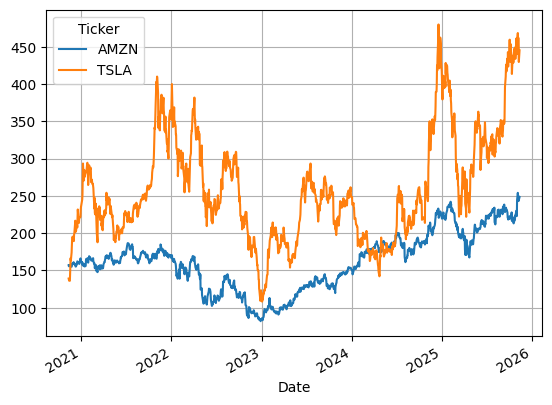

In [3]:
#Descargamos los tickers
ticker=['TSLA','AMZN']
data=yf.download(ticker,start='2020-11-11',end='2025-11-11')['Close']
data.plot(grid=True)


2. Calcule el rendimiento simple para ambas empresas.  <font size='1'>(0.5 puntos)</font>

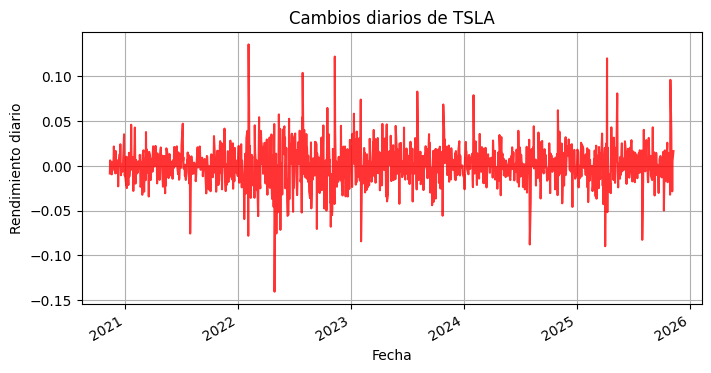

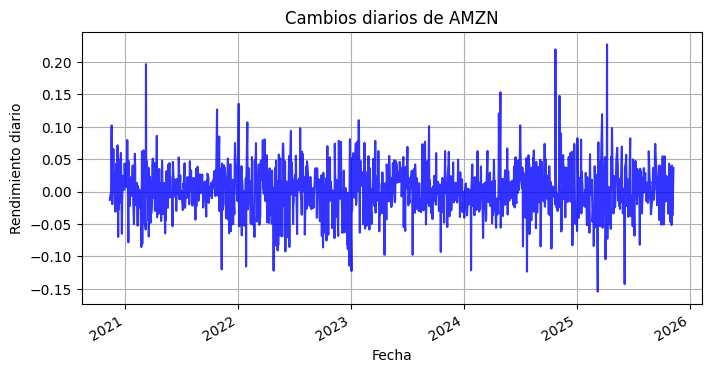

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

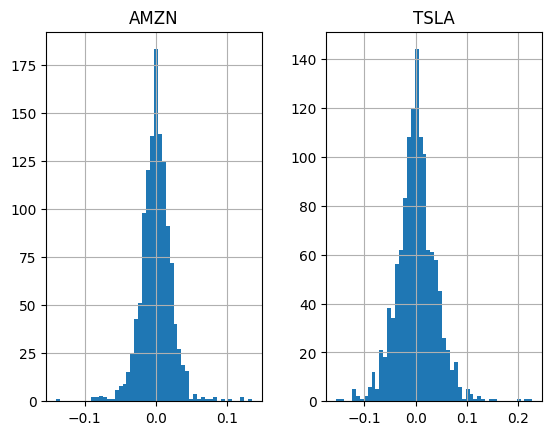

In [4]:
delta=data.pct_change().dropna()
colores=['red','blue']
for i in range(len(ticker)):
  plt.figure(figsize=(8,4))
  delta.iloc[:, i].plot(grid=True,c=colores[i],alpha=0.8)
  plt.title(f"Cambios diarios de {ticker[i]}")
  plt.xlabel("Fecha")
  plt.ylabel("Rendimiento diario")
  plt.show()
delta.hist(bins=50,grid=True)

4. Calcule la media y desviación estandar de los rendimientos y simule 10000 escenarios de rendimientos del 12 de noviembre al 25 de diciembre de 2025.  <font size='1'>(1.6 puntos)</font>

In [5]:
#Media y desviación estandar de cada empresa
for i in ticker:
  print(f'{i}')
  print(f'Media:{delta[i].mean()}', f'Desviación estandar:{delta[i].std()}')

#Simulación de rendimientos
N_dias=44
N_escenarios=10000
rango_tiempo=pd.date_range('2025-11-12',periods=N_dias)
delta_empresas={}

for i in ticker:
  delta_empresas[i]=pd.DataFrame((np.random.normal(delta[i].mean(),delta[i].std(),(N_dias,N_escenarios))),rango_tiempo)

TSLA
Media:0.0016699422668417971 Desviación estandar:0.03865608861730573
AMZN
Media:0.0006094908265333825 Desviación estandar:0.0220593228413655


5. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas.  <font size='1'>(1 punto)</font>

In [6]:
precios_empresas={}

for i in ticker:
  precios_empresas[i]=data[i].iloc[-1]*((delta_empresas[i]+1).cumprod())

6. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 15% a partir de la fecha indicada. ¿Cuál genera mayores espectativas?  <font size='1'>(1.2 puntos)</font>

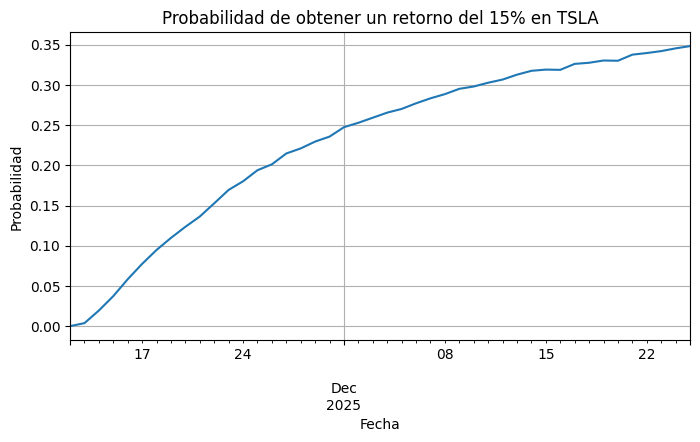

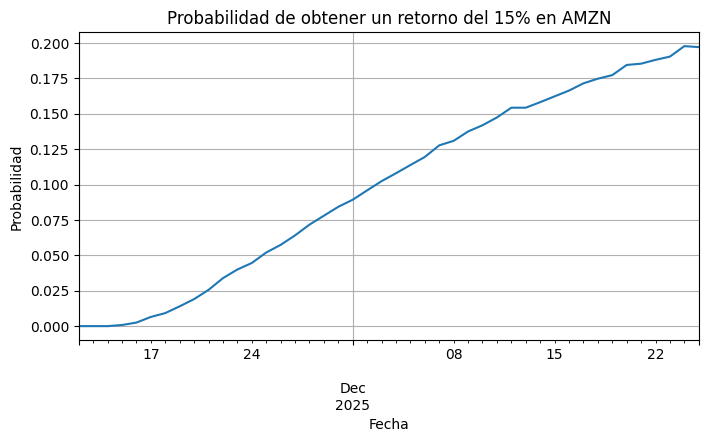

In [7]:
B={}
proba={}

for i in ticker:
  B[i]=precios_empresas[i]>data[i].iloc[-1]*1.15
  proba[i]=B[i].mean(axis=1)

for i in ticker:
  plt.figure(figsize=(8,4))
  proba[i].plot(grid=True)
  plt.title(f"Probabilidad de obtener un retorno del 15% en {i}")
  plt.xlabel("Fecha")
  plt.ylabel("Probabilidad")
  plt.show()

In [9]:
proba["TSLA"].iloc[-1]

np.float64(0.3482)

In [10]:
proba["AMZN"].iloc[-1]

np.float64(0.1971)

#**Resultados**

De acuerdo a los rendimientos simulados, al invertir en Tesla es más probable que obtener un retorno del $15\%$ que en Amazon. Hay un $34.82\%$ de que Tesla genere el retorno, mientras que Amazon tiene un $19.71\%$